In [94]:
import json
import pandas as pd
import os
import numpy as np
import requests
from dotenv import load_dotenv
import pathlib as path

In [95]:
load_dotenv()
api_key = os.getenv("CENSUS_API_KEY")

In [96]:
#All Census api requests start with https://api.census.gov/data
#Then it's the dataset (one of over 1,200), ex: 2018/pep/charagegroups
# Then "?get=" followed by the list of variables and geographies we want data for, ex:
#POP,GEONAME, DATE_DESC&DATE_CODE=11&RACE=10
#Then, set the geography/ Foe ex: "&for=county:*&in=state:24" The * means all available values

#https://api.census.gov/data/2018/pep/charagegroups?get=POP,GEONAME,DATE_DESC&DATE_CODE=
#11&RACE=10&for=county:*&in=state:24

In [97]:
# National & State population totals as of 7/1/23

In [98]:
# Relative path to the CSV file
#csv_file_path = './data/State_Population_Estimates_2023.csv'

# Read the CSV file into a DataFrame
raw_df = pd.read_csv('C:/Users/Daniel Quinn/Desktop/Bootcamp/Project_1_Working_Copy/Census/State_Population_Estimates_2023-edit.csv')

# Display the first few rows of the DataFrame
raw_df = pd.DataFrame(raw_df)
reindex_df = raw_df.dropna()
reindex_df = reindex_df.reset_index(drop=True)
reindex_df.head()
reindex_df.dtypes


Geographic Area                                object
Total Resident Population                      object
Resident Population Age 18 Years and Older     object
PopPercent                                    float64
dtype: object

In [99]:
#removed the commas from these cols to enable conversion to int

reindex_df["Total Resident Population"] = reindex_df[
    "Total Resident Population"].str.replace(',' , '')

reindex_df["Resident Population Age 18 Years and Older"] = reindex_df[
    "Resident Population Age 18 Years and Older"].str.replace(',' , '')

#removed the period from in front of each state name

reindex_df["Geographic Area"] = reindex_df[
    "Geographic Area"].str.replace('.' , '')

reindex_df.head()

,Geographic Area,Total Resident Population,Resident Population Age 18 Years and Older,PopPercent
0,United States,334914895,262083034,78.3
1,Northeast,56983517,45499951,79.8
2,Midwest,68909283,53689720,77.9
3,South,130125290,101091962,77.7
4,West,78896805,61801401,78.3


In [100]:
reindex_df["Total Resident Population"] = reindex_df[
    "Total Resident Population"].astype(int)

reindex_df["Resident Population Age 18 Years and Older"] = reindex_df[
    "Resident Population Age 18 Years and Older"].astype(int)

reindex_df.dtypes

Geographic Area                                object
Total Resident Population                       int32
Resident Population Age 18 Years and Older      int32
PopPercent                                    float64
dtype: object

In [101]:
reindex_df["Geographic Area"] = reindex_df["Geographic Area"]

state_final_df = reindex_df.drop(index=[0,1,2,3,4])
state_final_df = state_final_df.reset_index(drop=True)
state_final_df

,Geographic Area,Total Resident Population,Resident Population Age 18 Years and Older,PopPercent
0,Alabama,5108468,3977628,77.9
1,Alaska,733406,557899,76.1
2,Arizona,7431344,5848310,78.7
3,Arkansas,3067732,2362124,77.0
4,California,38965193,30519524,78.3
5,Colorado,5877610,4662926,79.3
6,Connecticut,3617176,2894190,80.0
7,Delaware,1031890,819952,79.5
8,District of Columbia,678972,552380,81.4
9,Florida,22610726,18229883,80.6


In [102]:
query_url = f'https://api.census.gov/data/2021/pep/population?get=DENSITY_2021,POP_2021,NAME,STATE,REGION&for=state'
query = requests.get(query_url).json()
print(json.dumps(query, indent=4))

[
    [
        "DENSITY_2021",
        "POP_2021",
        "NAME",
        "STATE",
        "REGION",
        "state"
    ],
    [
        "58.1171593930",
        "3986639",
        "Oklahoma",
        "40",
        null,
        "40"
    ],
    [
        "25.5629643700",
        "1963692",
        "Nebraska",
        "31",
        null,
        "31"
    ],
    [
        "224.4561379100",
        "1441553",
        "Hawaii",
        "15",
        null,
        "15"
    ],
    [
        "11.8108489860",
        "895376",
        "South Dakota",
        "46",
        null,
        "46"
    ],
    [
        "169.1679021400",
        "6975218",
        "Tennessee",
        "47",
        null,
        "47"
    ],
    [
        "28.6180620940",
        "3143991",
        "Nevada",
        "32",
        null,
        "32"
    ],
    [
        "17.4415070270",
        "2115877",
        "New Mexico",
        "35",
        null,
        "35"
    ],
    [
        "57.1690084670",
        "3193

In [103]:
query_df = pd.DataFrame(query)
query_df.head()
#query_df.describe()

,0,1,2,3,4,5
0,DENSITY_2021,POP_2021,NAME,STATE,REGION,state
1,58.1171593930,3986639,Oklahoma,40,None,40
2,25.5629643700,1963692,Nebraska,31,None,31
3,224.4561379100,1441553,Hawaii,15,None,15
4,11.8108489860,895376,South Dakota,46,None,46


In [104]:
#query_df

query_df.columns = query_df.iloc[0]
query_df = query_df[1:]
query_df.reset_index(drop=True, inplace=True)
query_df.head()

,DENSITY_2021,POP_2021,NAME,STATE,REGION,state
0,58.1171593930,3986639,Oklahoma,40,None,40
1,25.5629643700,1963692,Nebraska,31,None,31
2,224.4561379100,1441553,Hawaii,15,None,15
3,11.8108489860,895376,South Dakota,46,None,46
4,169.1679021400,6975218,Tennessee,47,None,47


In [105]:

renamed_query_df = query_df.rename(columns={
    "DENSITY_2021": "PopDensity/SqMi 2021",
    "POP_2021": "Total Population 2021",
    "NAME": "State",
    "STATE": "State Code",
    "REGION": "Region",
    "state": "state"}
)
del renamed_query_df['state']
renamed_query_df["Pop.Density/SqMi 2021"] = renamed_query_df[
    "PopDensity/SqMi 2021"].astype(float)

renamed_query_df["Total Population 2021"] = renamed_query_df[
    "Total Population 2021"].astype(int)

renamed_query_df["State Code"] = renamed_query_df[
    "State Code"].astype(int)

renamed_query_df["PopDensity/SqMi 2021"] = renamed_query_df[
    "PopDensity/SqMi 2021"].astype(float)

renamed_query_df1 = renamed_query_df[["State", "PopDensity/SqMi 2021"]]
renamed_query_df1= renamed_query_df1.drop(index=9)
renamed_query_df1.dropna()

,State,PopDensity/SqMi 2021
0,Oklahoma,58.117159
1,Nebraska,25.562964
2,Hawaii,224.456138
3,South Dakota,11.810849
4,Tennessee,169.167902
5,Nevada,28.618062
6,New Mexico,17.441507
7,Iowa,57.169008
8,Kansas,35.893254
10,Texas,113.018201


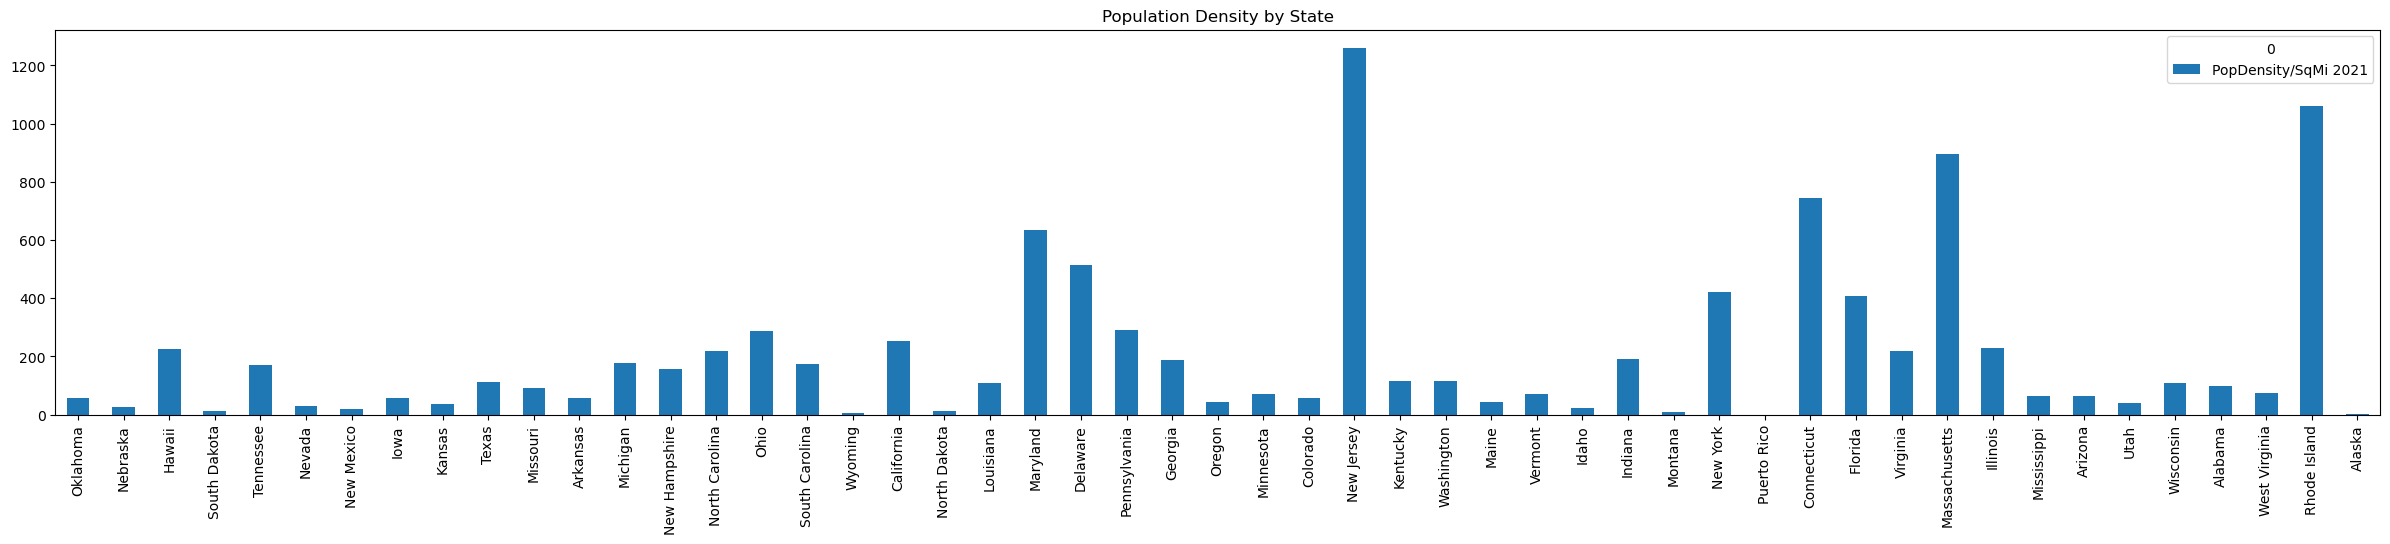

<Figure size 640x480 with 0 Axes>

In [111]:
import matplotlib.pyplot as plt
import numpy as n
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = renamed_query_df1.plot(kind="bar", figsize=(30,5), title="Population Density by State")

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(renamed_query_df1["State"], rotation=90)

plt.show()
plt.tight_layout()

In [107]:
#renamed_query_df.sum()
renamed_query_df.dtypes

0
PopDensity/SqMi 2021     float64
Total Population 2021      int32
State                     object
State Code                 int32
Region                    object
Pop.Density/SqMi 2021    float64
dtype: object